# **FINAL PROJECT BIG DATA DAN DATA MINING**

**Judul : Implementasi Logistic Regression untuk Klasifikasi Jamur Edible dan Beracun Berdasarkan Fitur Morfologi**

Link Dataset : https://www.kaggle.com/datasets/uciml/mushroom-classification

NAMA : NADIA MARTHA LEFI

NIM : 22.11.5140

KELAS : 22BDDM3

**Kasus :**

Project ini bertujuan untuk mengembangkan model klasifikasi yang mampu membedakan antara jamur yang dapat dimakan (edible) dan jamur beracun berdasarkan data fitur morfologi jamur. Dataset yang digunakan mencakup berbagai atribut seperti bentuk, warna, permukaan, dan bau. Metode utama yang diterapkan adalah Logistic Regression yang dioptimalkan melalui hyperparameter tuning untuk meningkatkan akurasi prediksi. Proyek ini juga mencakup eksplorasi data (EDA), preprocessing fitur, serta evaluasi performa model menggunakan metrik seperti confusion matrix, classification report, dan receiver operating characteristics (ROC) curve.

-------------------------------------------------------------------------------

# **Library**

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# **EDA**

In [265]:
current_directory = os.getcwd()

files_in_directory = os.listdir(current_directory)
print(f"Files in current directory: {current_directory}")
print(files_in_directory)

all_df = pd.read_csv('mushrooms.csv')
all_df.head()

Files in current directory: /content
['.config', 'mushrooms.csv', '22.11.5140_logistic_regression_model.h', '22.11.5140_logistic_regression_model.pkl', '22.11.5140_LogisticRegression', '22.11.5140_logistic_regression_model.py', '22.11.5140_logistic_regression_model.ipynb', 'sample_data']


class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [266]:
all_df.describe().T

count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises                   8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-root                8124      5   b  3776
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-type                 8124      1   p  8124
veil-color                8124      4   w  7924
ring-number               8124      3   o  7488
ring-type                 8124      5   p  3968
spore-print-color         8124      9   w  2388
population                8124      6   v  4040
habitat                   8124      7   d  3148

**Class**

In [267]:
all_df['class'] = all_df['class'].apply(lambda x:'Edible' if 'e' in x else 'Poisonous')

[Text(0, 0, '3916'), Text(0, 0, '4208')]

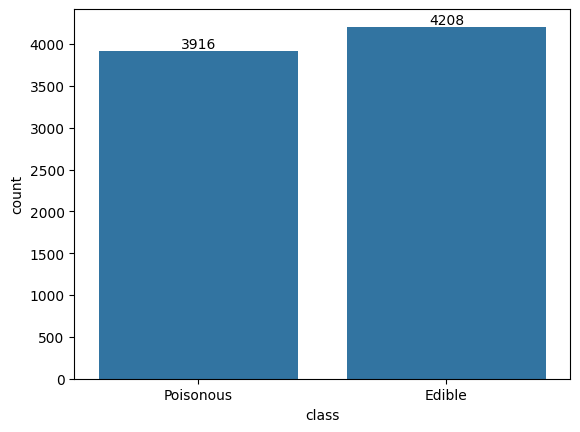

In [268]:
ax = sns.countplot(x=all_df['class'])
ax.bar_label(ax.containers[0])

**Cap-shape**

<ipython-input-269-d618396651c8>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('convex', 'bell','sunken','flat','knobbed','conical'))


[Text(0, 0, 'convex'),
 Text(1, 0, 'bell'),
 Text(2, 0, 'sunken'),
 Text(3, 0, 'flat'),
 Text(4, 0, 'knobbed'),
 Text(5, 0, 'conical')]

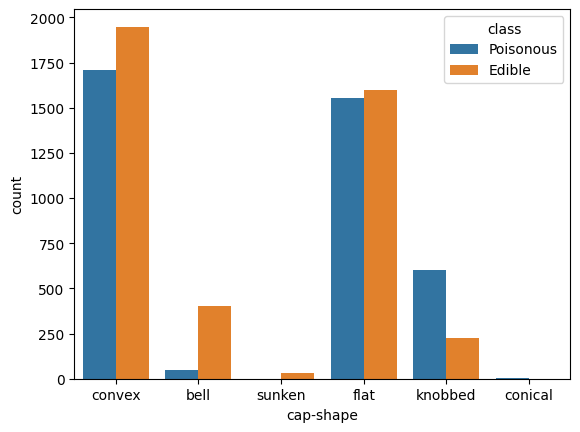

In [269]:
ax = sns.countplot(x=all_df['cap-shape'], hue=all_df['class'])
ax.set_xticklabels(('convex', 'bell','sunken','flat','knobbed','conical'))

**Cap-surface**

<ipython-input-270-32474a59b928>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('smooth', 'Scaly','fibrous','grooves'))


[Text(0, 0, 'smooth'),
 Text(1, 0, 'Scaly'),
 Text(2, 0, 'fibrous'),
 Text(3, 0, 'grooves')]

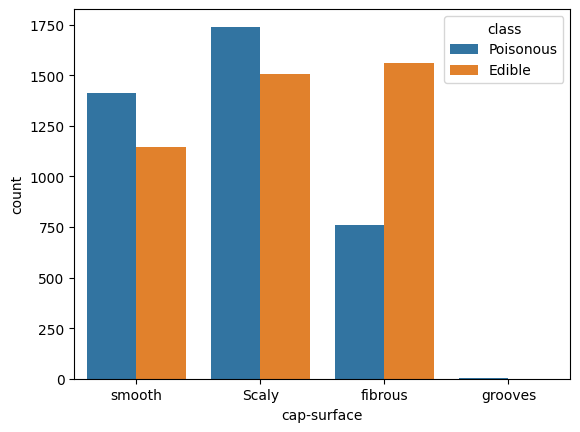

In [270]:
ax = sns.countplot(x=all_df['cap-surface'], hue=all_df['class'])
ax.set_xticklabels(('smooth', 'Scaly','fibrous','grooves'))

**Cap-colour**

<ipython-input-271-5741769927ea>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(('brown', 'yellow','white','gray','red','pink',' buff', 'purple', 'cinnamon', 'green'))


[Text(0, 0, 'brown'),
 Text(0, 1, 'yellow'),
 Text(0, 2, 'white'),
 Text(0, 3, 'gray'),
 Text(0, 4, 'red'),
 Text(0, 5, 'pink'),
 Text(0, 6, ' buff'),
 Text(0, 7, 'purple'),
 Text(0, 8, 'cinnamon'),
 Text(0, 9, 'green')]

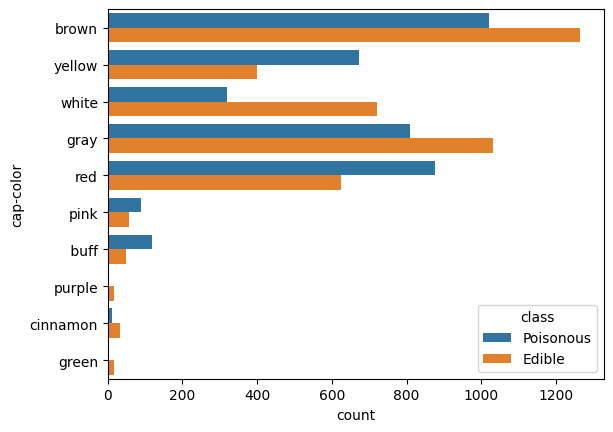

In [271]:
ax = sns.countplot(y=all_df['cap-color'], hue=all_df['class'])
ax.set_yticklabels(('brown', 'yellow','white','gray','red','pink',' buff', 'purple', 'cinnamon', 'green'))

**Bruises**

<ipython-input-272-696f7a5911b9>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('Bruises','no-bruises'))


[Text(0, 0, 'Bruises'), Text(1, 0, 'no-bruises')]

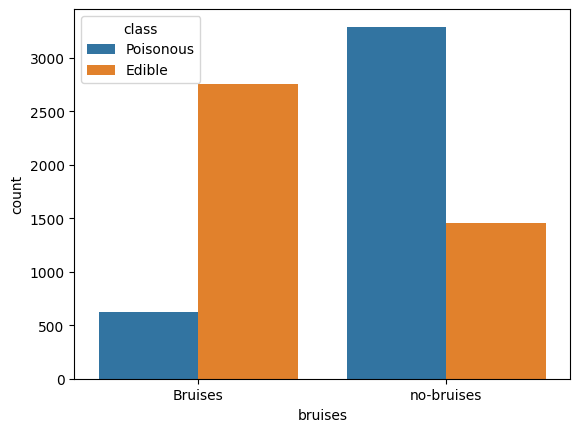

In [272]:
ax = sns.countplot(x=all_df['bruises'], hue=all_df['class'])
ax.set_xticklabels(('Bruises','no-bruises'))

**Odor**

<ipython-input-273-e4def8b3d3bd>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(('pungent','almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty'))


[Text(0, 0, 'pungent'),
 Text(0, 1, 'almond'),
 Text(0, 2, 'anise'),
 Text(0, 3, 'none'),
 Text(0, 4, 'foul'),
 Text(0, 5, 'creosote'),
 Text(0, 6, 'fishy'),
 Text(0, 7, 'spicy'),
 Text(0, 8, 'musty')]

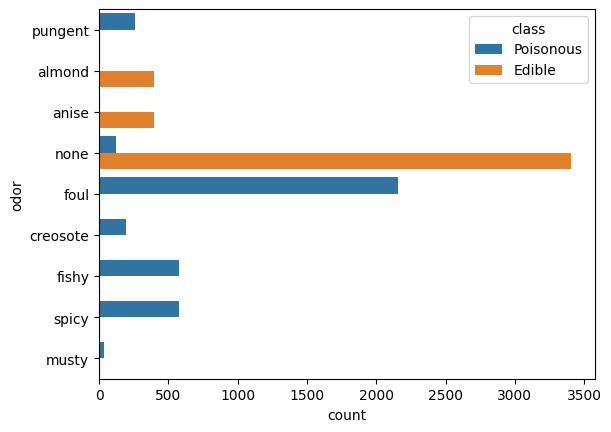

In [273]:
ax = sns.countplot(y=all_df['odor'], hue=all_df['class'])
ax.set_yticklabels(('pungent','almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty'))

<ipython-input-274-628451756174>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(('pungent','almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty'))


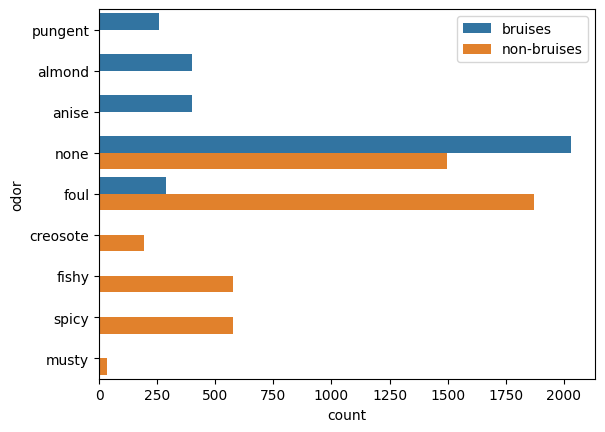

In [274]:
ax = sns.countplot(y=all_df['odor'], hue=all_df['bruises'])
ax.set_yticklabels(('pungent','almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty'))
ax.legend(labels=('bruises', 'non-bruises'))

**Korelasi Semua Fitur**

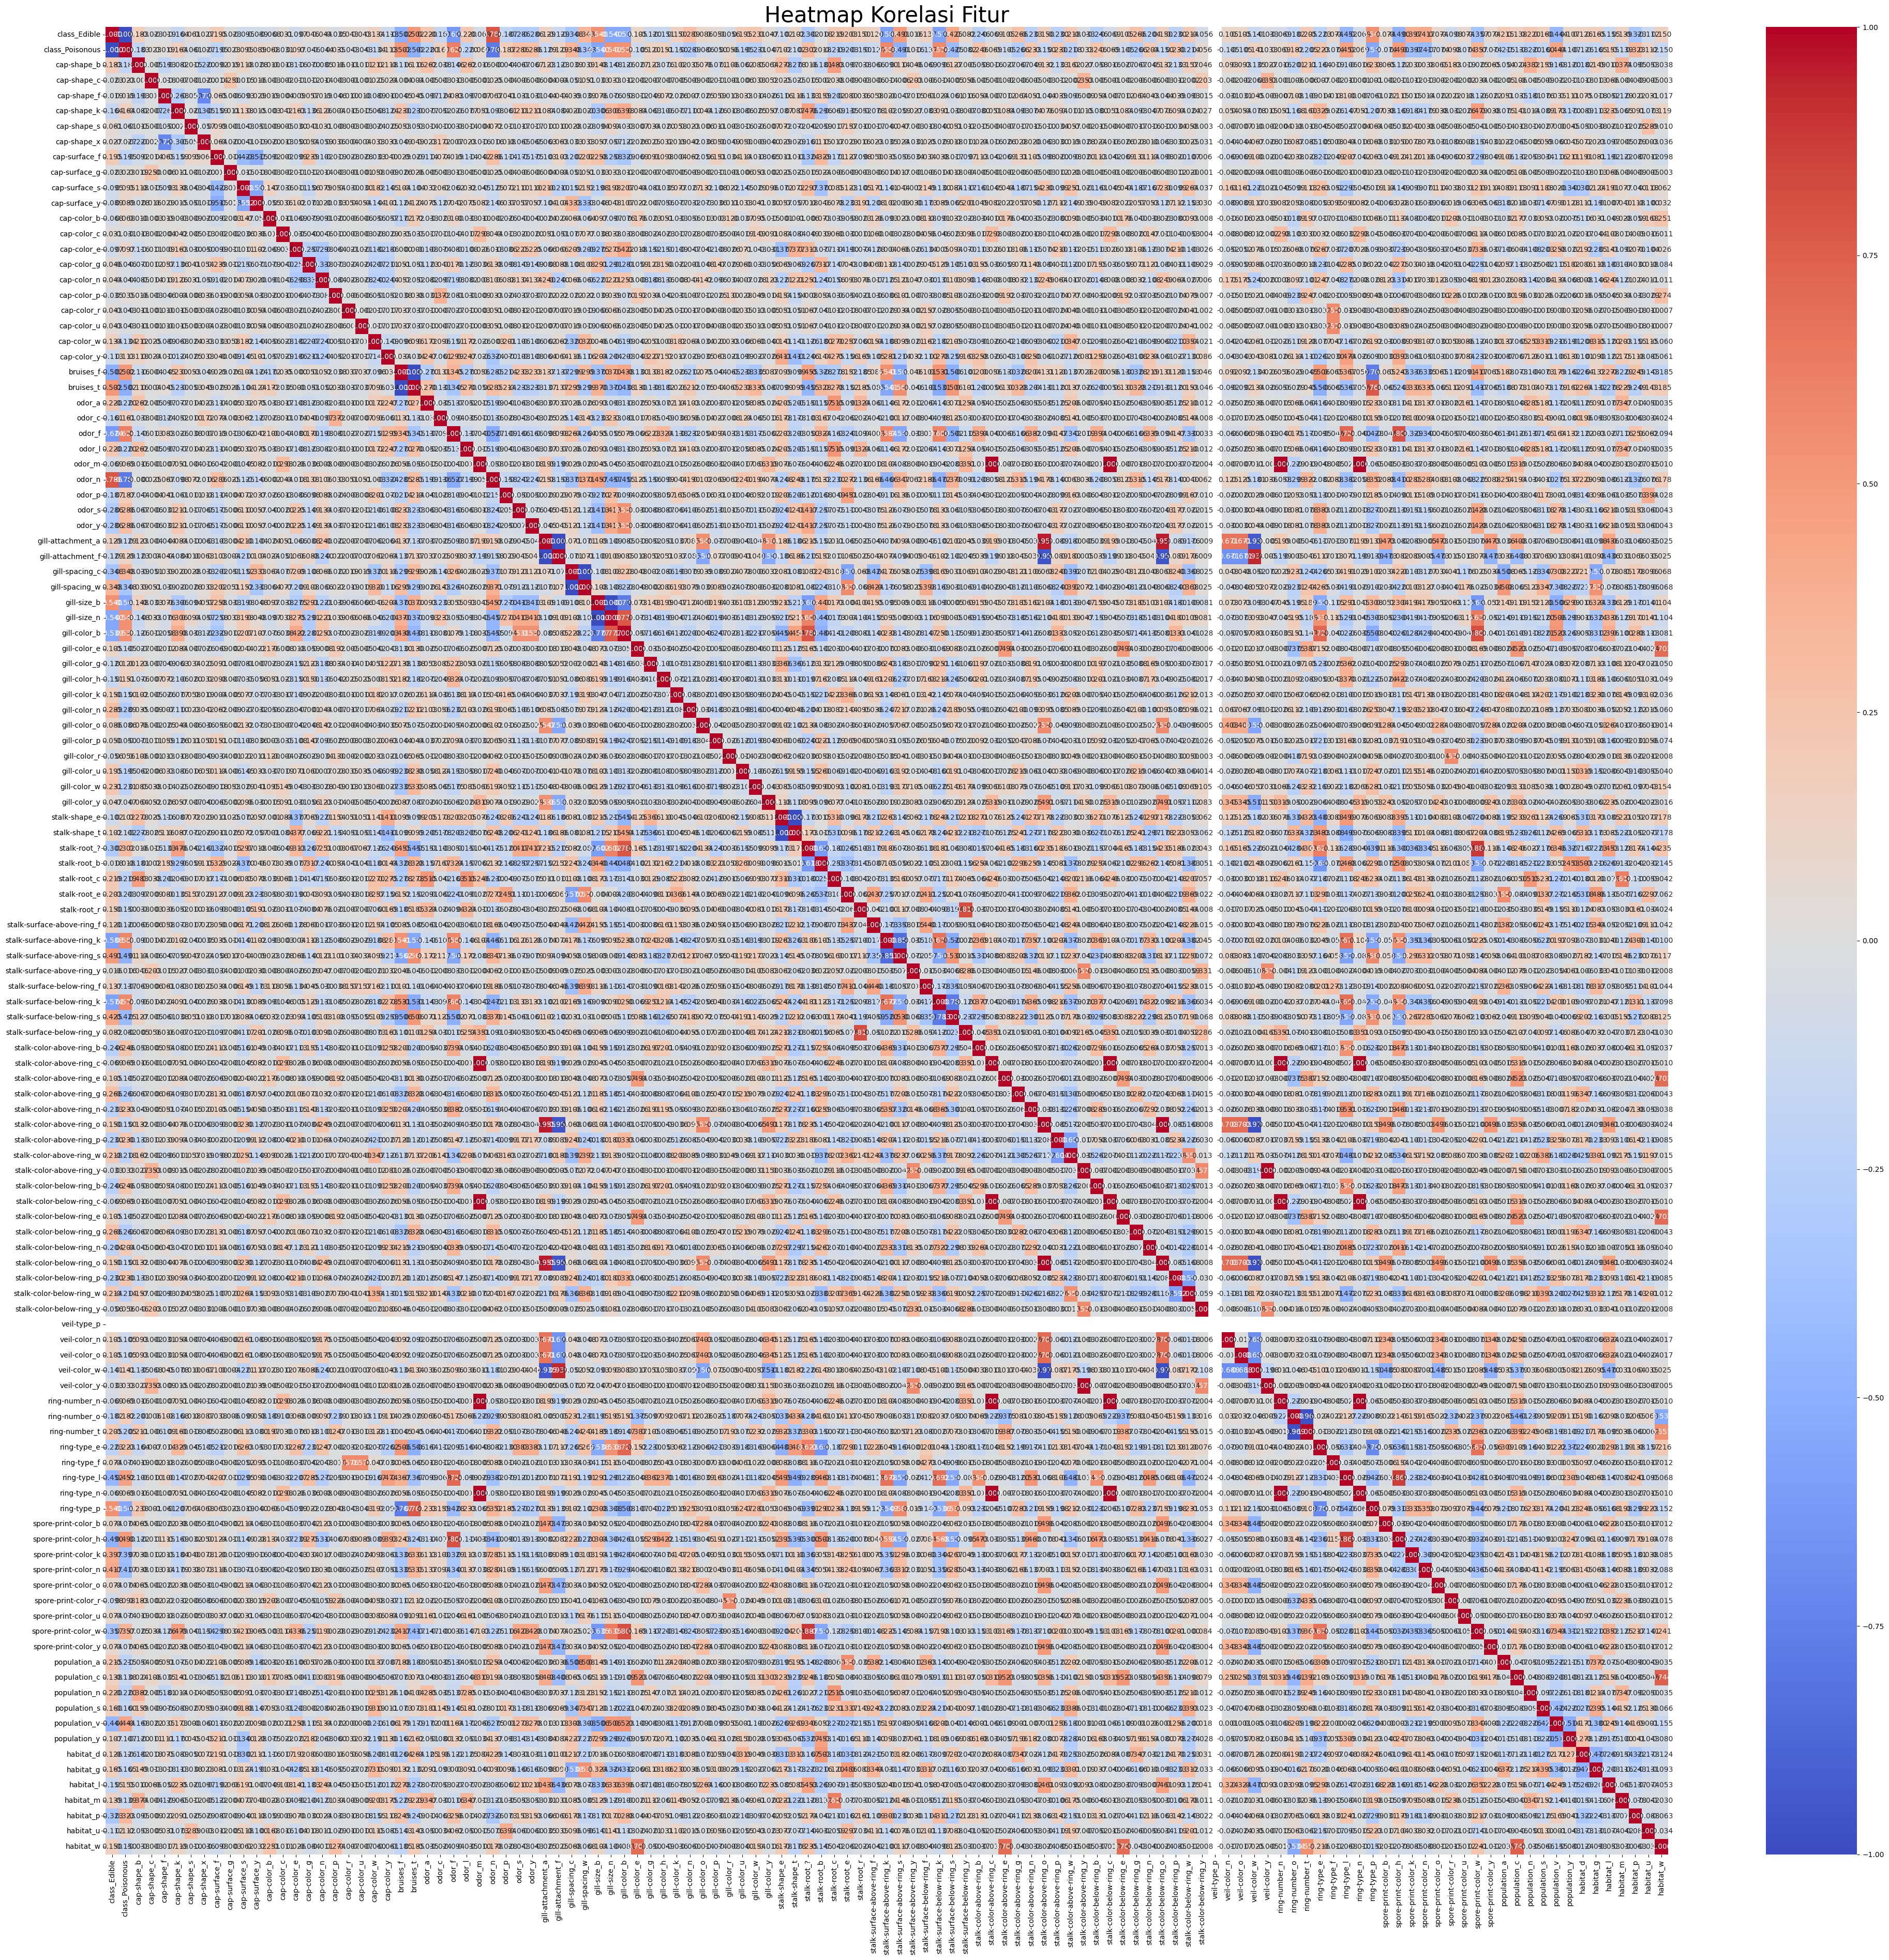

In [275]:
encoded_data = pd.get_dummies(all_df)

correlation_matrix = encoded_data.corr()

plt.figure(figsize=(40, 38))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Heatmap Korelasi Fitur', fontsize=30)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()


**Korelasi Fitur Utama**

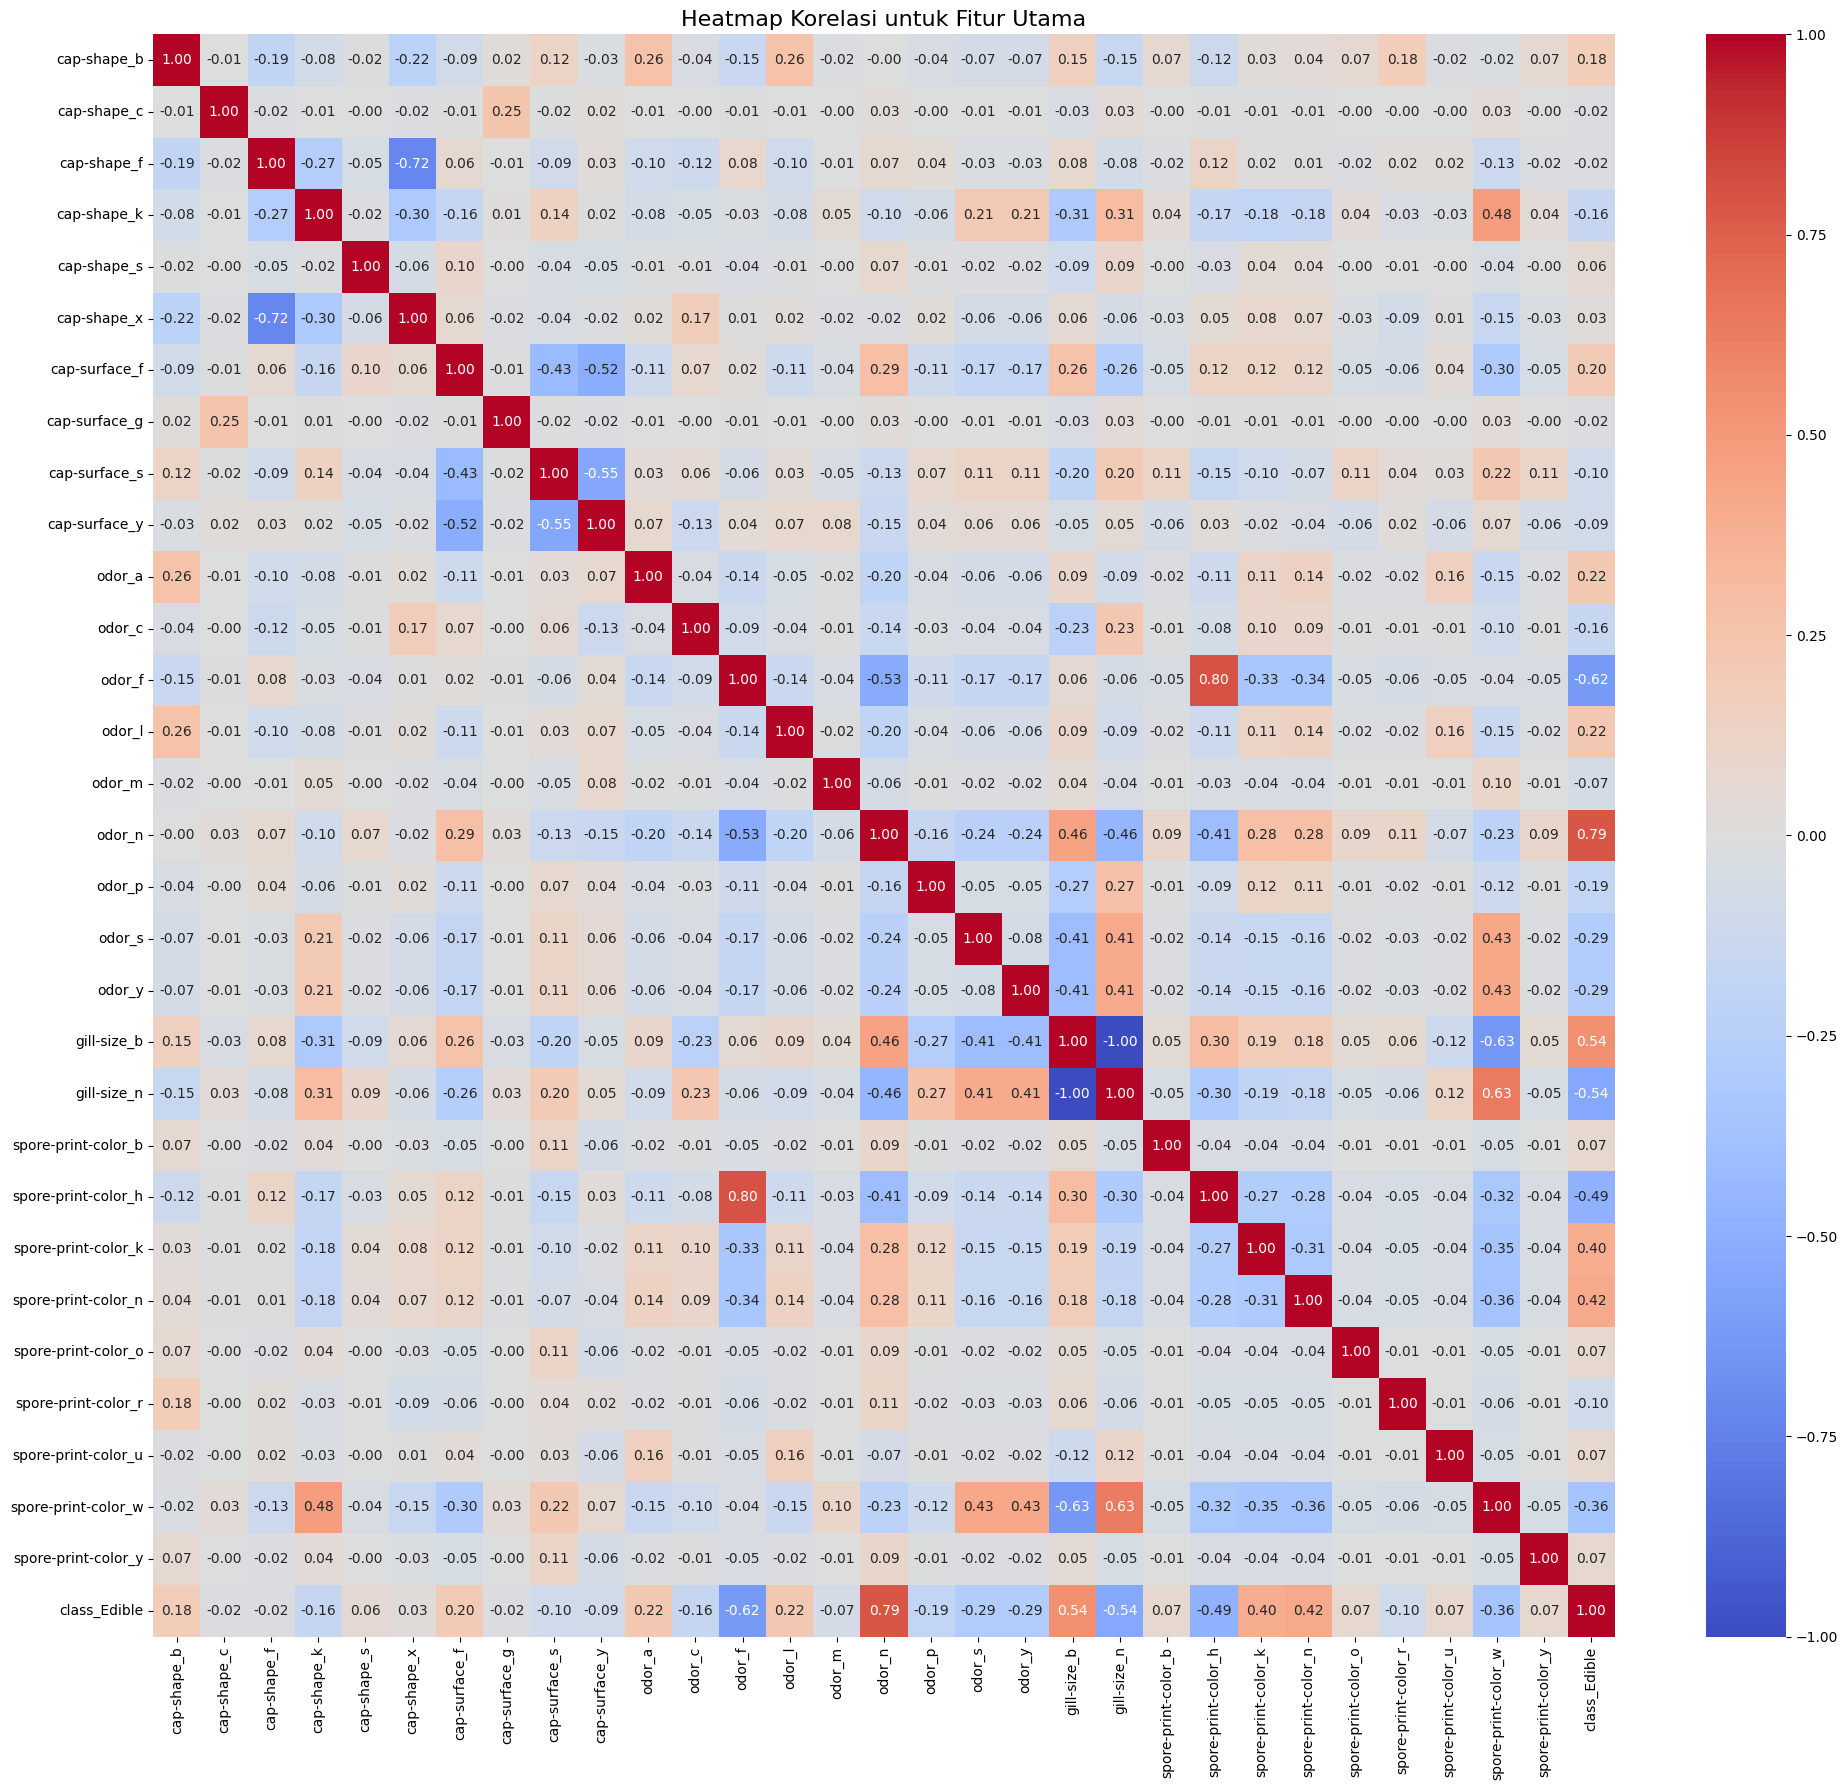

Fitur dengan korelasi tertinggi terhadap kelas target adalah 'odor_n' dengan nilai korelasi 0.79.


In [276]:
selected_features = [
    'cap-shape', 'cap-surface', 'odor', 'gill-size', 'spore-print-color'
]

selected_encoded_features = []
for feature in selected_features:
    selected_encoded_features.extend([col for col in encoded_data.columns if col.startswith(feature)])

selected_encoded_features.append('class_Edible')

selected_encoded_data = encoded_data[selected_encoded_features]

selected_correlation_matrix = selected_encoded_data.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(
    selected_correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    xticklabels=selected_encoded_features,
    yticklabels=selected_encoded_features
)
plt.title('Heatmap Korelasi untuk Fitur Utama', fontsize=16)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

odor_features = [col for col in selected_encoded_features if col.startswith('odor_')]
target_column = 'class_Edible'

odor_correlations = selected_correlation_matrix.loc[odor_features, target_column]

highest_correlation_feature = odor_correlations.idxmax()
highest_correlation_value = odor_correlations.max()

print(f"Fitur dengan korelasi tertinggi terhadap kelas target adalah '{highest_correlation_feature}' dengan nilai korelasi {highest_correlation_value:.2f}.")

**Korelasi Fitur Odor dengan Class Target**

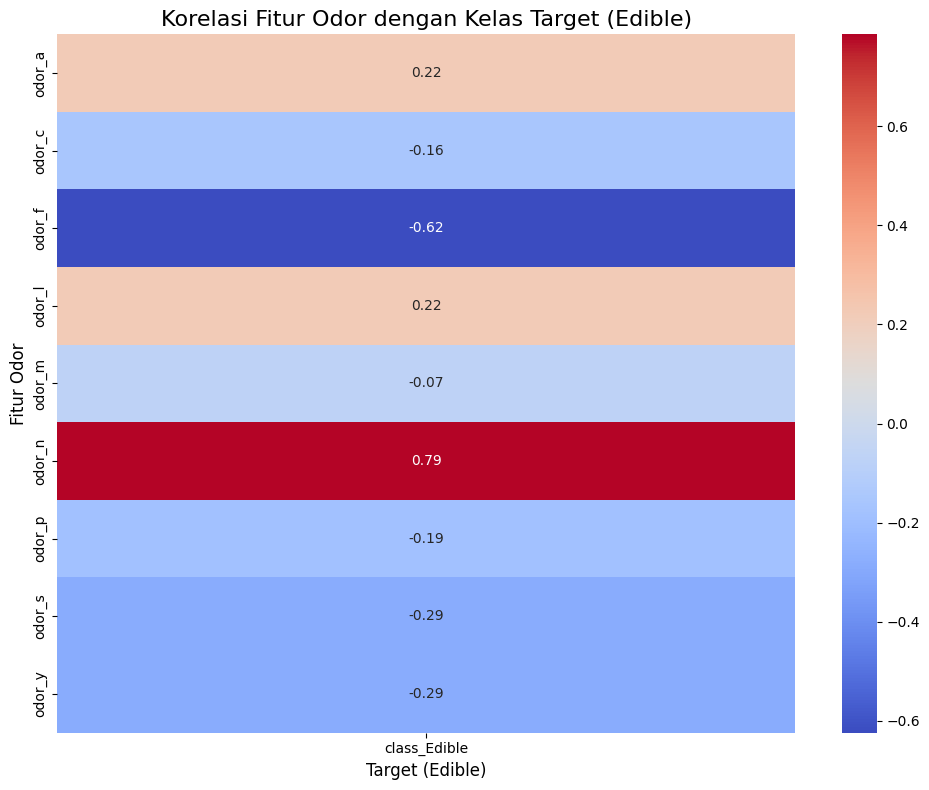

Fitur 'odor' dengan korelasi tertinggi terhadap kelas target adalah 'odor_n' dengan nilai korelasi 0.79.


In [277]:
odor_features = [col for col in encoded_data.columns if col.startswith('odor_')]
target_column = 'class_Edible'

odor_correlations = correlation_matrix.loc[odor_features, target_column]

highest_correlation_feature = odor_correlations.idxmax()
highest_correlation_value = odor_correlations.max()

plt.figure(figsize=(10, 8))
sns.heatmap(odor_correlations.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Korelasi Fitur Odor dengan Kelas Target (Edible)', fontsize=16)
plt.xlabel('Target (Edible)', fontsize=12)
plt.ylabel('Fitur Odor', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Fitur 'odor' dengan korelasi tertinggi terhadap kelas target adalah '{highest_correlation_feature}' dengan nilai korelasi {highest_correlation_value:.2f}.")

# **Pre-Processing**

In [278]:
y = all_df['class']
X = all_df.drop(labels =['class'],axis=1)

In [279]:
X.head()

cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 22 columns]

In [280]:
X = pd.get_dummies(X)
X.head()

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0        False        False        False        False        False   
1        False        False        False        False        False   
2         True        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False        False        False   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0         True          False          False           True          False   
1         True          False          False           True          False   
2        False          False          False           True          False   
3         True          False          False          False           True   
4         True          False          False           True          False   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...          True         False         False      False      False   
1  ...         False         False         False      False       True   
2  ...         False         False         False      False      False   
3  ...          True         False         False      False      False   
4  ...         False         False         False      False       True   

   habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0      False      False      False       True      False  
1      False      False      False      False      False  
2      False       True      False      False      False  
3      False      False      False       True      False  
4      False      False      False      False      False  

[5 rows x 117 columns]

In [281]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=3, stratify=y_train)

In [283]:
y_train

array([0, 1, 0, ..., 1, 0, 1])

# **Model**

In [284]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y, single_feature= False):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):

            linear_model = np.dot(X, self.weights) + self.bias

            y_predicted = self._sigmoid(linear_model)


            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]

        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
"""
def regression_solver(X, y):
    # Add a column of ones to X for the bias term
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Use the normal equations to calculate the coefficients
    XtX = np.dot(X.T, X)
    XtX_inv = np.linalg.inv(XtX)
    Xty = np.dot(X.T, y)
    coefficients = np.dot(XtX_inv, Xty)

    # The first element is the bias term, and the rest are feature coefficients
    return coefficients
"""

'\ndef regression_solver(X, y):\n    # Add a column of ones to X for the bias term\n    X = np.hstack((np.ones((X.shape[0], 1)), X))\n\n    # Use the normal equations to calculate the coefficients\n    XtX = np.dot(X.T, X)\n    XtX_inv = np.linalg.inv(XtX)\n    Xty = np.dot(X.T, y)\n    coefficients = np.dot(XtX_inv, Xty)\n\n    # The first element is the bias term, and the rest are feature coefficients\n    return coefficients\n'

In [285]:
def accuracy_score(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

# **Hyperparameter Tuning**

In [286]:
learning_rates=[0.1,0.01,0.001,0.0001]
def hypTune(X_train, y_train, X_val, y_val):
    scores = []
    for lr in learning_rates:
        logReg = LogisticRegression(lr)
        logReg.fit(X_train, y_train)
        predict = logReg.predict(X_val)
        acc = accuracy_score(y_val, predict)
        scores.append(acc)
    return scores

In [287]:
scores = hypTune(X_train, y_train, X_val, y_val)
scores

[0.984182776801406, 0.9420035149384886, 0.883128295254833, 0.8892794376098418]

# **Training**

In [288]:
LR = LogisticRegression(0.1)
LR.fit(X_train, y_train)

Koefisien untuk Fitur Utama (Sub-Fitur):
                 Feature  Coefficient  Absolute_Coefficient
27                odor_n    -2.250123              2.250123
24                odor_f     1.294173              1.294173
36           gill-size_n     1.181064              1.181064
35           gill-size_b    -1.170152              1.170152
28                odor_p     0.815625              0.815625
96   spore-print-color_h     0.801786              0.801786
23                odor_c     0.673091              0.673091
98   spore-print-color_n    -0.649705              0.649705
25                odor_l    -0.646286              0.646286
22                odor_a    -0.593662              0.593662
100  spore-print-color_r     0.570356              0.570356
97   spore-print-color_k    -0.550397              0.550397
29                odor_s     0.292500              0.292500
30                odor_y     0.266810              0.266810
101  spore-print-color_u    -0.208490              0.208490

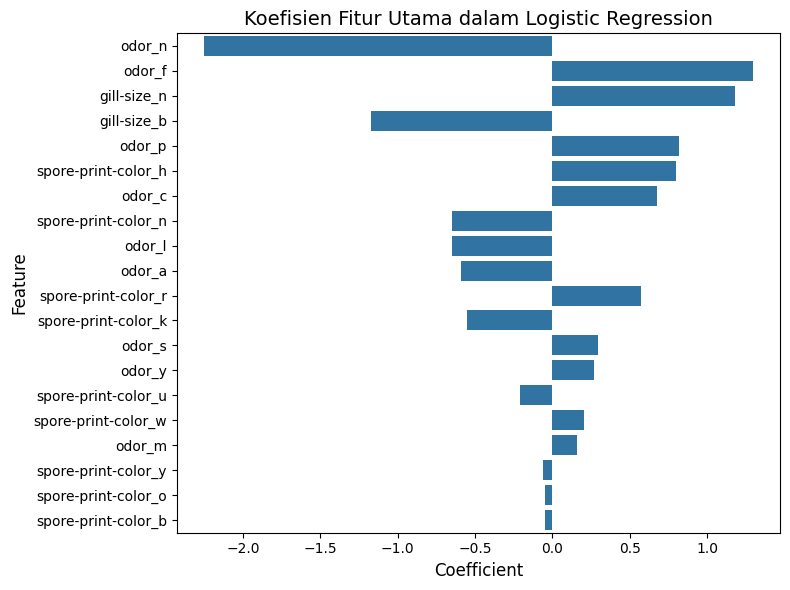

In [289]:
encoded_features = X_train.columns.tolist()

selected_main_features = ['odor', 'gill-size', 'spore-print-color']
selected_encoded_features = []
for feature in selected_main_features:
    selected_encoded_features.extend([col for col in encoded_features if col.startswith(feature)])

coefficients = LR.weights

coef_df = pd.DataFrame({
    'Feature': encoded_features,
    'Coefficient': coefficients
})

selected_coef_df = coef_df[coef_df['Feature'].isin(selected_encoded_features)].copy()

selected_coef_df['Absolute_Coefficient'] = selected_coef_df['Coefficient'].abs()

selected_coef_df = selected_coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("Koefisien untuk Fitur Utama (Sub-Fitur):")
print(selected_coef_df)

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=selected_coef_df)
plt.title('Koefisien Fitur Utama dalam Logistic Regression', fontsize=14)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


In [290]:
predict = LR.predict(X_val)
predict

array([0, 0, 1, ..., 0, 0, 0])

In [291]:
accuracy_score(y_val, predict)

0.984182776801406

In [292]:
def cross_validation(X, y, model, k=5):
    """
    Perform k-fold cross-validation for a given model.

    Parameters:
        X (numpy.ndarray): Feature matrix.
        y (numpy.ndarray): Target vector.
        model: Your custom logistic regression model.
        k (int): Number of folds for cross-validation.

    Returns:
        List of accuracy scores for each fold.
    """
    n = len(X)
    fold_size = n // k
    accuracy_scores = []

    for i in range(k):

        start, end = i * fold_size, (i + 1) * fold_size
        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)
        X_val, y_val = np.array(X[start:end]), np.array(y[start:end])

        model.fit(X_train, y_train)


        y_pred = model.predict(X_val)

        accuracy = accuracy_score(y_val, y_pred)
        accuracy_scores.append(accuracy)

    return accuracy_scores

In [293]:
accuracy = cross_validation(X_train, y_train, LR, k=5)
np.average(accuracy)

0.9874587458745875

# **Evaluation**

In [294]:
predict = LR.predict(X_test)

In [295]:
accuracy = accuracy_score(y_test, predict)
accuracy

0.9819524200164069

In [296]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predict)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1263
           1       0.99      0.97      0.98      1175

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



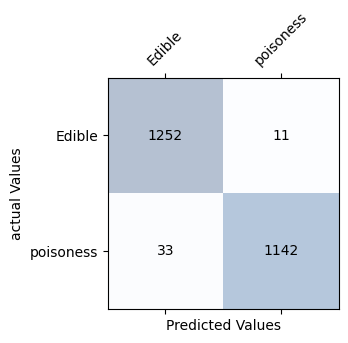

In [297]:
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
classes=["Edible", "poisoness"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values',)
plt.ylabel('actual Values',);
print(classification_report(y_test, predict))

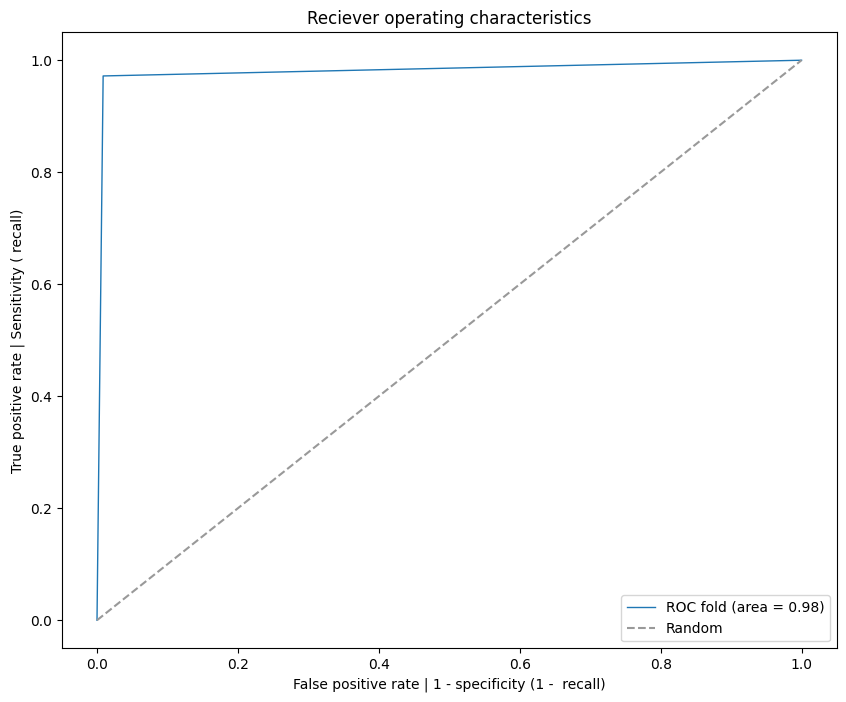

In [298]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10,8))

fpr, tpr, thresholds = roc_curve(y_test, predict)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, lw=1, label='ROC fold (area = %0.2f)' %(roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate | 1 - specificity (1 -  recall)')
plt.ylabel('True positive rate | Sensitivity ( recall)')
plt.title('Reciever operating characteristics')
plt.legend(loc="lower right")

In [299]:
sel_features = X_train[['bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y']]
sel_features

bruises_f  bruises_t  odor_a  odor_c  odor_f  odor_l  odor_m  odor_n  \
2357      False       True   False   False   False   False   False    True   
6683       True      False   False   False    True   False   False   False   
7500       True      False   False   False   False   False   False    True   
3568      False       True   False   False   False   False   False    True   
1597       True      False   False   False   False   False   False    True   
...         ...        ...     ...     ...     ...     ...     ...     ...   
1677       True      False   False   False   False   False   False    True   
734       False       True   False   False   False    True   False   False   
5084       True      False   False   False    True   False   False   False   
2961      False       True   False   False   False   False   False    True   
4596       True      False   False   False    True   False   False   False   

      odor_p  odor_s  odor_y  
2357   False   False   False  
6683   False   False   False  
7500   False   False   False  
3568   False   False   False  
1597   False   False   False  
...      ...     ...     ...  
1677   False   False   False  
734    False   False   False  
5084   False   False   False  
2961   False   False   False  
4596   False   False   False  

[4548 rows x 11 columns]

In [300]:
accuracy = cross_validation(sel_features, y_train, LR, k=5)
np.average(accuracy)

0.9881188118811881

In [301]:
import joblib

model_filename = "22.11.5140_logistic_regression_model.ipynb"
joblib.dump(LR, model_filename)
print(f"Model disimpan sebagai '{model_filename}'")

Model disimpan sebagai '22.11.5140_logistic_regression_model.ipynb'


In [302]:
loaded_model = joblib.load(model_filename)
print("Model berhasil dimuat kembali.")

Model berhasil dimuat kembali.
